# **Load package**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance

import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# **Load dataset and clean column**

In [42]:
df = pd.read_csv("subset.csv")

In [43]:
df.head(2)

,i_clall9220,i_clall9419,i_clall9420,i_clall9427,i_clall9429,i_clall9840,i_clinc9617,i_clmul9217,i_clmul9218,i_clmul9219,...,w_eqs20bg2r090k,w_eqs30bg2r090k,w_eqs40bg2r090k,w_eqs50bg2r090k,w_eqs60bg2r090k,w_eqs70bg2r090k,s_f001n_score,pk_reseq,s_lift_plus_ml,f_sample5050f2
0,False,0,0,0,0,99995,99995,0,0,0,...,0.078012,0.116976,0.155911,0.194819,0.233698,0.272549,105.64,1037530,437,2
1,False,0,0,0,0,99995,99995,0,0,0,...,0.191815,0.287618,0.383352,0.479016,0.574612,0.670138,273.52,2054360,567,2


In [44]:
df.columns.get_loc("d_sbg2r090")

313

In [45]:
#313 is the object column index
valid_column = list(range(299))
valid_column.append(313)

In [46]:
df2 = df.iloc[:, valid_column]

In [47]:
df2.head(2)

,i_clall9220,i_clall9419,i_clall9420,i_clall9427,i_clall9429,i_clall9840,i_clinc9617,i_clmul9217,i_clmul9218,i_clmul9219,...,i_trtr3244,i_trtr3282,i_trtr3503,i_trtr4243,i_trtr4503,i_tstu1755,i_tstu2606,i_tstu3606,i_tstu3755,d_sbg2r090
0,False,0,0,0,0,99995,99995,0,0,0,...,5,100,3,19,4,9998,999999998,999999998,9998,1
1,False,0,0,0,0,99995,99995,0,0,0,...,998,998,98,998,98,9998,999999998,999999998,9998,1


**Transform Categorical Variable**

In [48]:
#Categorize all "No..." value type to be "N/A"
col_name = ['i_clall9220','i_all6120','i_all6190','i_all6203','i_all6230','i_all6250','i_all6460',
                               'i_all6970','i_aua6200','i_mta6200','i_mta6270','i_mta6280','i_mtf6280','i_rev6270']
for i in col_name:
  df2[i] = np.where((df[i] == 994) | (df[i] == 999) | (df[i] == 997) | (df[i] == 996) | (df[i] == 998) , "N/A", df[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [49]:
df_new = pd.get_dummies(df2, columns = ['i_clall9220','i_all6120','i_all6190','i_all6203','i_all6230','i_all6250','i_all6460',
                               'i_all6970','i_aua6200','i_mta6200','i_mta6270','i_mta6280','i_mtf6280','i_rev6270'])

In [50]:
df_new.head(2)

,i_clall9419,i_clall9420,i_clall9427,i_clall9429,i_clall9840,i_clinc9617,i_clmul9217,i_clmul9218,i_clmul9219,i_clntr9417,...,i_mtf6280_90,i_mtf6280_N/A,i_rev6270_0,i_rev6270_1,i_rev6270_120,i_rev6270_30,i_rev6270_400,i_rev6270_60,i_rev6270_90,i_rev6270_N/A
0,0,0,0,0,99995,99995,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,99995,99995,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# **Generate Train and test**

In [62]:
X_data = df_new.loc[:, df_new.columns != "d_sbg2r090"]
Y_data = df_new.loc[:, df_new.columns == "d_sbg2r090"]

In [64]:
#Transform and scale data
scaler = StandardScaler()
X_data = scaler.fit_transform(X_data)
X_data = pd.DataFrame(X_data)

In [65]:
X_data = X_data.join(df.iloc[:, df.columns == "w_tds50bg2r090k"])

In [66]:
Y_data.head()

,d_sbg2r090
0,1
1,1
2,0
3,1
4,0


In [67]:
train_x, test_x, train_y, test_y = train_test_split(X_data, Y_data, test_size=0.2, random_state=40)

In [68]:
weight = test_x.iloc[:,test_x.columns == 'w_tds50bg2r090k'].values

In [69]:
train_x = train_x.loc[:, train_x.columns != "w_tds50bg2r090k"]
test_x = test_x.loc[:, test_x.columns != "w_tds50bg2r090k"]

In [70]:
test_x.head(2)

,0,1,2,3,4,5,6,7,8,9,...,373,374,375,376,377,378,379,380,381,382
5742,-0.228374,-0.180136,-0.085455,-0.179868,0.349133,0.561484,0.479527,0.3273,0.024161,-0.013818,...,-0.049194,0.696433,-0.11902,0.606107,-0.118273,-0.246824,-0.211813,-0.133806,-0.082285,-0.362646
4150,-0.228374,-0.180136,-0.085455,-0.179868,0.349133,0.561484,0.479527,0.3273,0.024161,-0.013818,...,-0.049194,0.696433,-0.11902,0.606107,-0.118273,-0.246824,-0.211813,-0.133806,-0.082285,-0.362646


# **Feature Test RFE(Skip this block)**

In [ ]:
train_x = train_x.values
train_y = train_y.values
test_x = test_x.values
test_y = test_y.values

In [ ]:
len(train_x)

In [ ]:
#set the model below

In [ ]:
#try the log model first
model = LogisticRegression()


defined a fuction to receive any model to perform rfe feature selection(so that we don't need to copy paste code agian whenever start a new model)


In [ ]:
#function to output preddiction result
def out_put_pre_rfe(model,n_features, train_x, train_y,test_x):
  rfe = RFE(model,n_features_to_select=n_features, step=1)
  global se_fe
  se_fe = rfe.fit(train_x, train_y)
  se_fe.fit(train_x,train_y)
  global predictions
  predictions = se_fe.predict(test_x)
  return predictions

#function to output feature names
def out_put_feature_name(rfe_obj):
  feature_name = df.columns.tolist()
  feature_name.remove('d_sbg2r090')
  try:
    selected_fe = rfe_obj.get_feature_names_out(feature_name)
    print(selected_fe)
  except:
    print("pls run the out_put_pre_rfe function first")
  


In [ ]:
#use defined function to output the selected feature_nmae
out_put_feature_name(rfe_obj = se_fe)

In [ ]:
#Call the funciton to get the prediction result

In [ ]:
out_put_pre_rfe(model, 80, train_x, train_y, test_x)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_y, predictions, sample_weight=weight)

# **GBT Model Fitting**

In [71]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(train_x, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [ ]:
y_pred

array([0.46260784, 0.87960329, 0.62818347, ..., 0.62465691, 0.69174299,
       0.67995083])

In [72]:
y_pred = reg.predict(test_x)
from sklearn.metrics import accuracy_score

roc_auc_score(test_y, y_pred, sample_weight= weight)

0.8315493494200409

In [ ]:
from sklearn.model_selection import GridSearchCV
#We have test different range of value for paramters, and below is the last set of values we tested.
params = {
    'max_depth': [4],
    'n_estimators': [300,500],
    'learning_rate': [0.01,0.1],
    "min_samples_split": [5],
}

#Initialise XGBoost Model
reg1 = ensemble.GradientBoostingRegressor(**params,loss= "squared_error")

# Define grid search
grid_search= GridSearchCV(
    estimator=reg1,
    param_grid=params,
    scoring = 'roc_auc',
    n_jobs = 1,
    cv = 5,
    verbose=True
)

# Fit grid search
model2 = grid_search.fit(train_x,train_y.values.ravel())
print("Best parameters:", model2.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 500}


No imporvement after tuning parameter.

**result of auc 0.831 after scale data, 0.824 no scale data**

# **Feature importance**

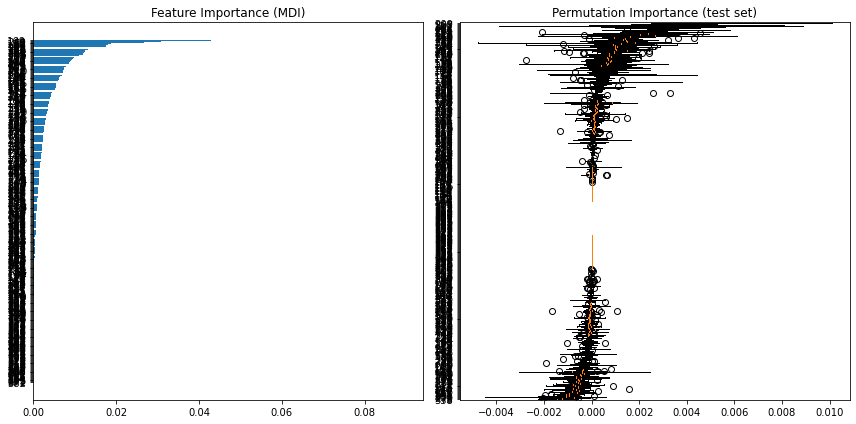

In [73]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(test_x.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, test_x, test_y, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(test_x.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [ ]:
#Try to use top 150 important feature
imp_idx = list(sorted_idx)
name_list = test_x.columns
idx_lis = []
for i, value in enumerate(imp_idx):
  if value < 150:
    idx_lis.append(i)
  else:
    continue
print(idx_lis)

[2, 6, 7, 8, 13, 17, 19, 20, 24, 25, 26, 29, 34, 37, 39, 41, 44, 46, 47, 48, 49, 51, 52, 56, 57, 59, 61, 62, 64, 65, 66, 68, 69, 70, 71, 72, 73, 80, 81, 83, 85, 88, 89, 90, 97, 98, 100, 101, 102, 105, 106, 107, 108, 115, 119, 121, 123, 125, 126, 130, 132, 211, 212, 215, 217, 221, 222, 223, 224, 225, 226, 227, 228, 229, 231, 232, 234, 237, 240, 241, 251, 252, 259, 261, 262, 265, 266, 267, 269, 270, 275, 276, 277, 279, 281, 283, 286, 287, 289, 292, 294, 295, 298, 303, 306, 307, 310, 312, 313, 315, 316, 317, 319, 324, 325, 329, 330, 331, 332, 335, 337, 339, 341, 344, 345, 346, 347, 349, 353, 356, 359, 360, 361, 364, 365, 367, 369, 371, 375, 376, 378, 380, 381, 382, 385, 389, 391, 392, 393, 396]


In [ ]:
selected_fe = test_x.columns[idx_lis]

In [ ]:
#Rewrite train and test using the selected feature
train_x = train_x.iloc[:, idx_lis]
test_x = test_x.iloc[:, idx_lis]

In [ ]:
#Fit the model again
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(train_x, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [ ]:
#Evaluate
y_pred = reg.predict(test_x)
roc_auc_score(test_y, y_pred, sample_weight= weight)

0.822920199069189

Auc not imporved by feature selection, top100 auc 0.81, top 100 0.82

# **Xgboost Model Fitting**

In [ ]:
%%capture
model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        use_label_encoder=False,
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(train_x, train_y), (test_x, test_y)]

model.fit(train_x, train_y.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'max_depth': [6,10],
    'n_estimators': [6, 200],
    'learning_rate': [0.01]
}

#Initialise XGBoost Model
xgb1 = xgb.XGBClassifier(subsample=0.9, objective='binary:logistic')

# Define grid search
grid_search= GridSearchCV(
    estimator=xgb1,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 1,
    cv = 5,
    verbose=True
)

# Fit grid search
model1 = grid_search.fit(train_x,train_y.values.ravel())
print("Best parameters:", model1.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


KeyboardInterrupt: ignored

In [ ]:
%%capture
model = xgb.XGBClassifier(max_depth=6,
                        subsample=0.9,
                        objective='binary:logistic',
                        use_label_encoder=False,
                        n_estimators=200,
                        learning_rate = 0.01)
eval_set = [(train_x, train_y), (test_x, test_y)]

model.fit(train_x, train_y.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

# **Evaluate**

In [ ]:
y_pred = model.predict(test_x)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
roc_auc_score(test_y, y_pred, sample_weight= weight)


Accuracy: 67.24%


0.6499734557932155